In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis

In [2]:
data = pd.read_csv('slimmed_realestate_data.csv')
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


     Unnamed: 0  SalePrice  GrLivArea
0             1     181500       1262
1             7     200000       2090
2             9     118000       1077
3            12     144000        912
4            15     132000        854
..          ...        ...        ...
546        1449      92000        630
547        1456     210000       2073
548        1457     266500       2340
549        1458     142125       1078
550        1459     147500       1256

[551 rows x 3 columns]


<AxesSubplot:xlabel='GrLivArea'>

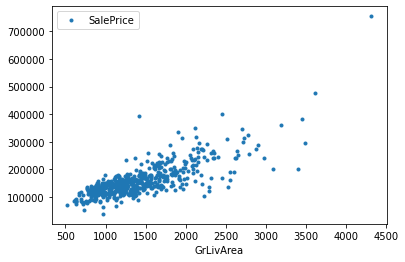

In [3]:
print(data)
data.plot(x='GrLivArea',y='SalePrice',style='.')

## Calculated Linear Regression

In [4]:
n = len(data)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator

# saving these for later comparison
m_calc = m
b_calc = b
print('y = %f * x + %f' % (m_calc, b_calc))

y = 87.688145 * x + 34754.077892


In [5]:
def plot_data(x,y,m,b,plt = plt):
    plt.plot(x,y,'bo')
    linear_x = np.arange(x.min(),x.max())
    linear_y = linear_x * m + b
    plt.plot(linear_x,linear_y,'r-',label='fit')

## Define functions

In [6]:
def model(x, m, b):
    return m * x + b

def loss(x, y, m, b):
    y_predicted = model(x,m,b)
    return np.power(y - y_predicted, 2)

def updated_m(x,y,m,b,learning_rate):
    dL_dm = - 2 * x * (y - model(x,m,b))
    dL_dm = np.mean(dL_dm)
    return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
    dL_db = - 2 * (y - model(x,m,b))
    dL_db = np.mean(dL_db)
    return b - learning_rate * dL_db

[199]  dy_i = 87.73 * x + 34693.60     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1477782141.762275


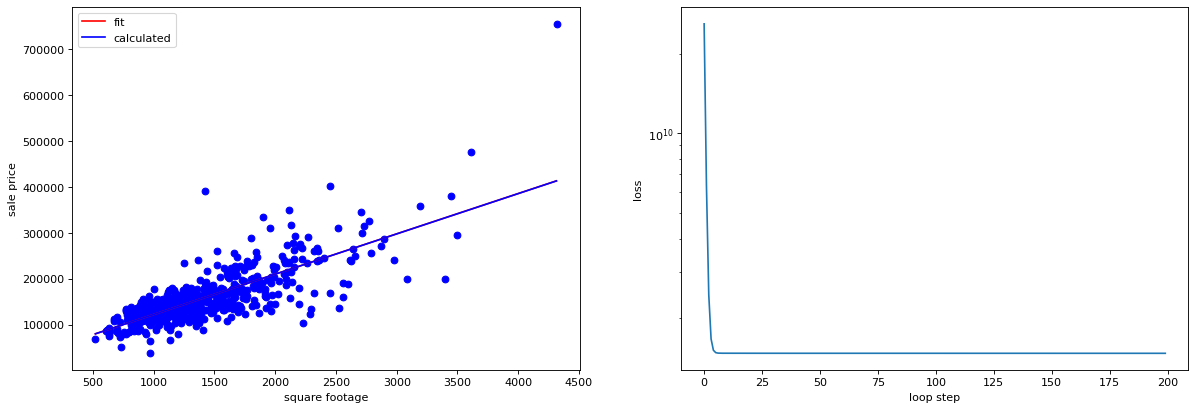

In [7]:
# set our initial slope and intercept
m = 5.
b = 1000.
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

# we run our loop N times
loop_N = 200
for i in range(loop_N):
   
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_x = data['GrLivArea'].to_numpy()
    data_y = data['SalePrice'].to_numpy()
    
    # calculate the loss value
    loss_value = np.mean(loss(data_x,data_y,m,b))

    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)
        
    # keep a history of our loss values
    loss_history.append(loss_value)

    # print our progress
    print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

    # close/delete previous plots
    plt.close('all')

    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y)
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
    # gives us time to see the plot
    time.sleep(0.5)
    # clears the plot when the next plot is ready to show.
    ipydis.clear_output(wait=True)

# In Class Exercises

1. In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller _batches_ where each _batch_ contains `batch_size` inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our `data` variable is a Pandas `DataFrame` object, search for "how to sample a DataFrame".

[199]  dy_i = 87.41 * x + 35178.55     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1477804639.019715


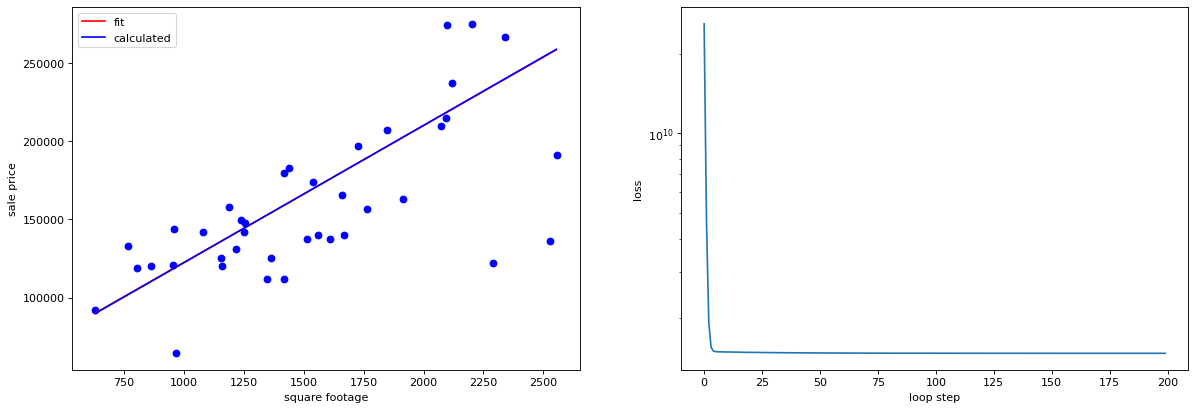

In [8]:
# Set the dataset in batch and update parameters after all batches are considered
m = 5.
b = 1000.
learning_rate_m = 1e-7
learning_rate_b = 1e-1
loss_history = []
loop_N = 200
batch_size = 64
loss_value = 0

for i in range(loop_N):
    total, loss_value = 0, 0
    dL_dm, dL_db = 0, 0
    for batch in pd.read_csv('slimmed_realestate_data.csv', chunksize=batch_size):
        data_x = batch['GrLivArea'].to_numpy()
        data_y = batch['SalePrice'].to_numpy()
        
        # calculate loss and gradient
        temp = data_y - model(data_x, m, b)
        loss_value += sum(np.power(temp, 2))
        dL_dm += sum(-2 * temp * data_x)
        dL_db += sum(-2 * temp)
        total += len(data_x)
        
    loss_value /= total
    dL_dm /= total
    dL_db /= total
    loss_history.append(loss_value)
    
    m -= learning_rate_m * dL_dm
    b -= learning_rate_b * dL_db
    print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
    plt.close('all')

    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    plot_data(data_x,data_y,m,b,ax[0])
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y)
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()

    time.sleep(0.05)
    ipydis.clear_output(wait=True)

[029]  dy_i = 82.46 * x + 35529.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1330853027.474427


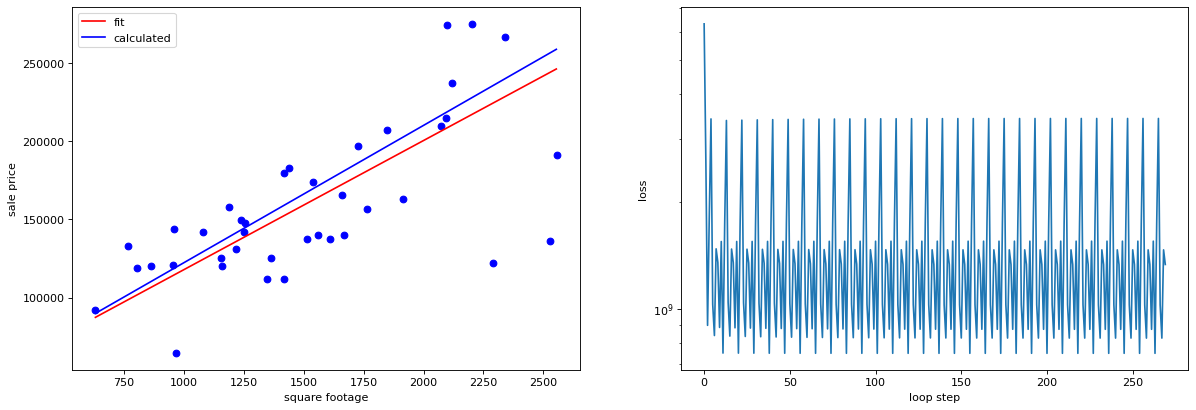

In [9]:
# Set the dataset in batch and update parameters after every batch has been considered.
m = 5.
b = 1000.
learning_rate_m = 1e-7
learning_rate_b = 1e-1
loss_history = []
loop_N = 30
batch_size = 64

for i in range(loop_N):
    for batch in pd.read_csv('slimmed_realestate_data.csv', chunksize=batch_size):
   
        data_x = batch['GrLivArea'].to_numpy()
        data_y = batch['SalePrice'].to_numpy()

        m = updated_m(data_x,data_y,m,b,learning_rate_m)
        b = updated_b(data_x,data_y,m,b,learning_rate_b)

        loss_value = np.mean(loss(data_x,data_y,m,b))
        loss_history.append(loss_value)
        print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
        plt.close('all')

        fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
        plot_data(data_x,data_y,m,b,ax[0])
        line_x = np.arange(data_x.min(),data_x.max())
        line_y = line_x * m_calc + b_calc
        ax[0].plot(line_x,line_y,'b-',label='calculated')
        ax[0].legend()
        ax[0].set_xlabel('square footage')
        ax[0].set_ylabel('sale price')

        loss_x = np.arange(0,len(loss_history))
        loss_y = np.asarray(loss_history)
        ax[1].plot(loss_x,loss_y)
        ax[1].set_yscale('log')
        ax[1].set_xlabel('loop step')
        ax[1].set_ylabel('loss')
        plt.show()

        time.sleep(0.25)
        ipydis.clear_output(wait=True)

2. As described above, learning rates that grow smaller over time can help find and get closer to global minima. In the loop above, our `learning_rate_m` and `learning_rate_b` are constant through the process of minimizing our parameters. How could you change the loop to reduce the learning rates over loop iterations?

[029]  dy_i = 81.39 * x + 39311.33     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1507314183.013259


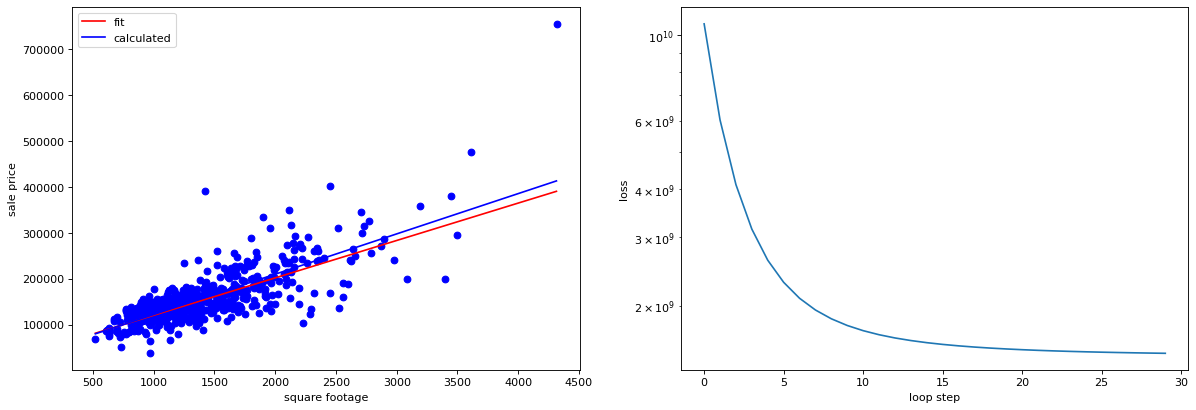

In [10]:
def updated_m(x,y,m,b,learning_rate, n):
    dL_dm = - 2 * x * (y - model(x,m,b))
    dL_dm = np.mean(dL_dm)
    return m - (learning_rate/(1+0.5*n)) * dL_dm

def updated_b(x,y,m,b,learning_rate, n):
    dL_db = - 2 * (y - model(x,m,b))
    dL_db = np.mean(dL_db)
    return b - (learning_rate/(1+0.5*n)) * dL_db

m = 5.
b = 1000.
learning_rate_m = 1e-7
learning_rate_b = 1e-1
loss_history = []

loop_N = 30
for i in range(loop_N):
    data_x = data['GrLivArea'].to_numpy()
    data_y = data['SalePrice'].to_numpy()
    m = updated_m(data_x,data_y,m,b,learning_rate_m, len(loss_history)+1)
    b = updated_b(data_x,data_y,m,b,learning_rate_b, len(loss_history)+1)
    loss_value = np.mean(loss(data_x,data_y,m,b))
    loss_history.append(loss_value)
    print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

    plt.close('all')

    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    plot_data(data_x,data_y,m,b,ax[0])

    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y)
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
    time.sleep(0.01)
    ipydis.clear_output(wait=True)